In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

- df1 represent the training data sets 
- df2 represent testing data sets 

# TRAINING DATASETS

In [82]:
df1= pd.read_csv('termdeposit_train.csv')
df1

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [83]:
df1.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

- There few cells like Job, materil, Education,default,loan,housing, contact, month, Poutcome and subcribe are object dataset we need to convert them into int or float datasets 

In [84]:
df1.shape

(31647, 18)

### Univariate Analysis

<AxesSubplot:xlabel='subscribed', ylabel='count'>

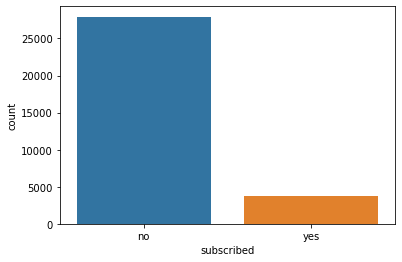

In [85]:
df1['subscribed'].value_counts()
sns.countplot(data=df1,x='subscribed')

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


<AxesSubplot:xlabel='job', ylabel='count'>

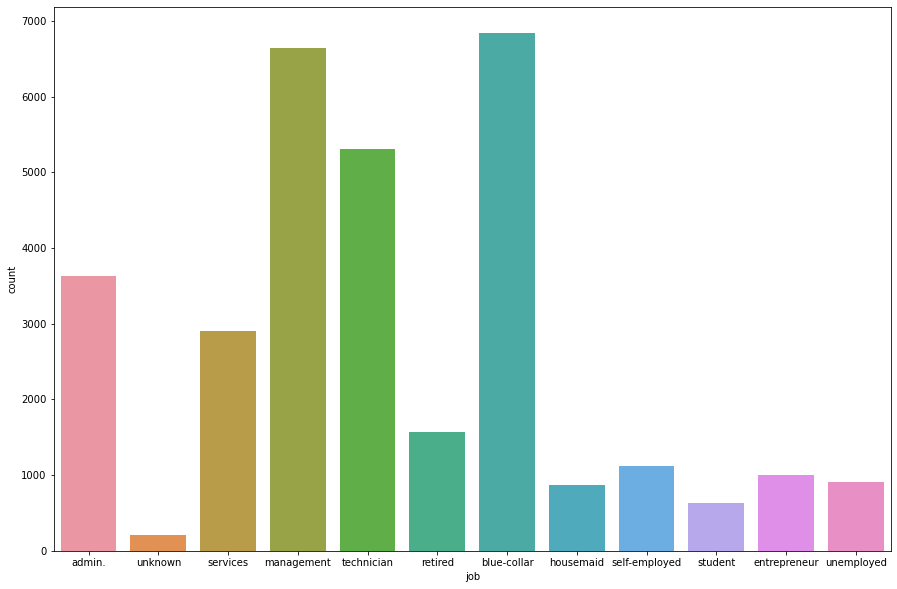

In [89]:
plt.figure(figsize=(15,10))
print(df1['job'].value_counts())
sns.countplot(data=df1,x='job')

<AxesSubplot:>

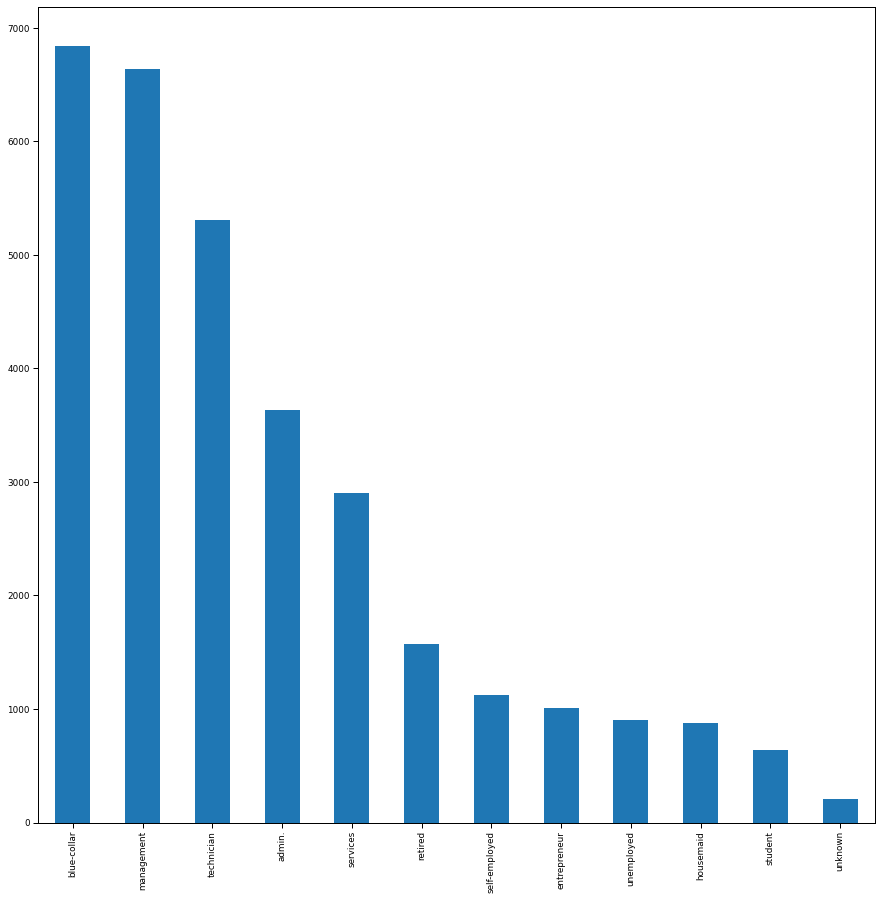

In [97]:
sns.set_context('paper')
plt.figure(figsize=(15,15))
df1['job'].value_counts().plot(kind='bar')

- Job is clearly indicated as catagorical data
- The major jobs are reflected in domain of blue-coller and management task while unknow count is only 206

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


<AxesSubplot:xlabel='marital', ylabel='count'>

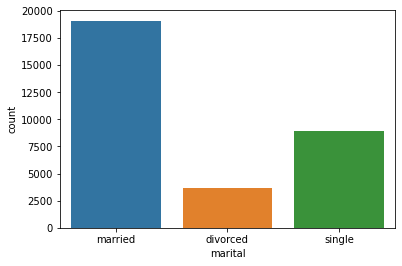

In [90]:
print(df1['marital'].value_counts())
sns.countplot(data=df1,x='marital')

- In the marital staus married is having good count upto 19095 while divorced is upto 3630

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64


<AxesSubplot:xlabel='contact', ylabel='count'>

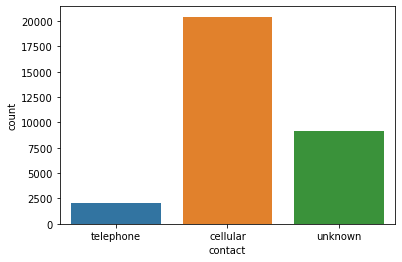

In [91]:
print(df1['contact'].value_counts())
sns.countplot(data=df1,x='contact')

- The major dat is availabe in the cellular contact i.e 20423 while very less is using telephone 2047

### Bivariant Analysis

In [98]:
df1.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

<AxesSubplot:xlabel='marital', ylabel='count'>

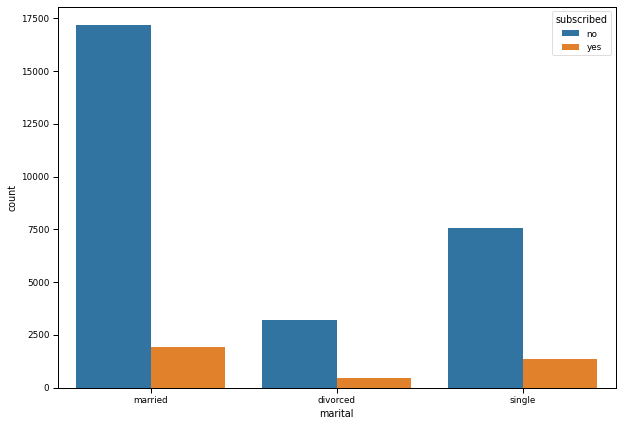

In [103]:
plt.figure(figsize=(10,7))
sns.countplot(data=df1, x='marital', hue= 'subscribed')

<AxesSubplot:xlabel='education', ylabel='count'>

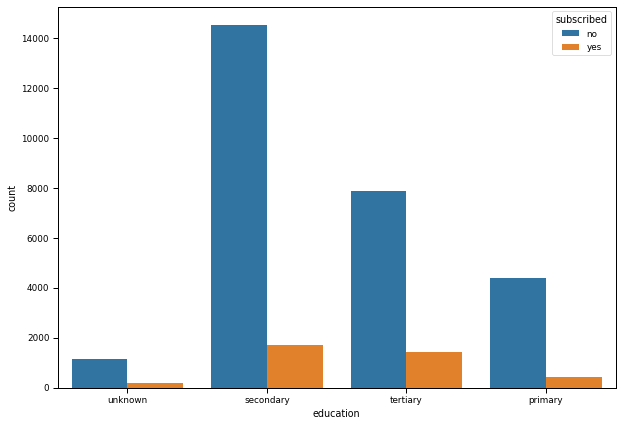

In [107]:
plt.figure(figsize=(10,7))
sns.countplot(data=df1, x='education', hue= 'subscribed')

<AxesSubplot:xlabel='housing', ylabel='count'>

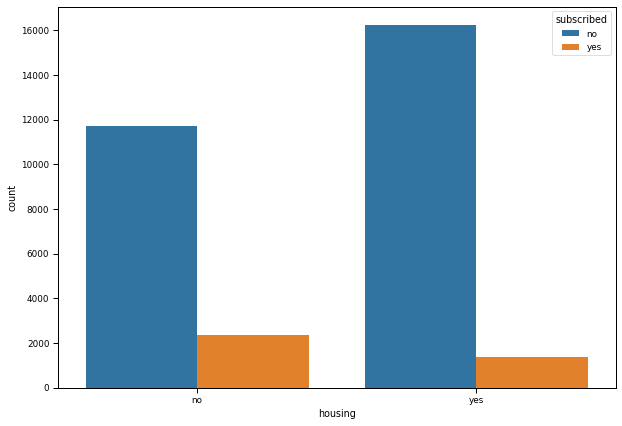

In [105]:
plt.figure(figsize=(10,7))
sns.countplot(data=df1, x='housing', hue= 'subscribed')

- From Yes housing catagory reflect maximum negative subcription (i.e. No subcription) as compair to No housing vice vera in case of YES

In [110]:
pd.crosstab(df1['marital'], df1['subscribed'])

subscribed,no,yes
marital,,
divorced,3185,445
married,17176,1919
single,7571,1351


subscribed     no   yes
loan                   
no          23132  3384
yes          4800   331


<AxesSubplot:xlabel='loan', ylabel='count'>

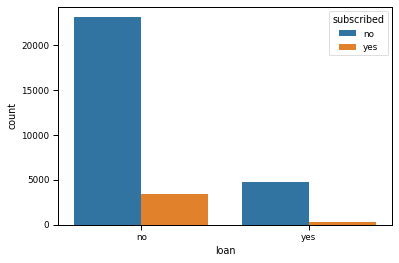

In [112]:
print(pd.crosstab(df1['loan'], df1['subscribed']))
sns.countplot(x=df1['loan'],hue=df1['subscribed'])

In [113]:
from sklearn.preprocessing import OrdinalEncoder

In [114]:
oe= OrdinalEncoder()
for i in df1.columns:
    if df1[i].dtypes=='object':
        df1[i]=oe.fit_transform(df1[i].values.reshape(-1,1))
df1

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,3.0,0.0
1,40576,31,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,3.0,0.0
2,15320,27,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,3.0,0.0
3,43962,57,4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,2.0,1.0
4,29842,31,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,4.0,2.0,2.0,0.0,0,1.0,0.0,0.0,12,8.0,116,2,-1,0,3.0,0.0
31643,40178,53,4.0,0.0,2.0,0.0,380,0.0,1.0,0.0,5,6.0,438,2,-1,0,3.0,1.0
31644,19710,32,4.0,2.0,2.0,0.0,312,0.0,0.0,0.0,7,1.0,37,3,-1,0,3.0,0.0
31645,38556,57,9.0,1.0,1.0,0.0,225,1.0,0.0,1.0,15,8.0,22,7,337,12,0.0,0.0


In [115]:
df1.dtypes

ID              int64
age             int64
job           float64
marital       float64
education     float64
default       float64
balance         int64
housing       float64
loan          float64
contact       float64
day             int64
month         float64
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome      float64
subscribed    float64
dtype: object

In [116]:
df1.describe()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,4.332923,1.167220,1.225013,0.018485,1363.890258,0.555629,0.162132,0.644642,15.835466,5.533131,258.113534,2.765697,39.576042,0.574272,2.566152,0.117389
std,13075.936990,10.625134,3.271868,0.607186,0.749195,0.134700,3028.304293,0.496904,0.368578,0.899480,8.337097,3.004247,257.118973,3.113830,99.317592,2.422529,0.982069,0.321888
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,11218.000000,33.000000,1.000000,1.000000,1.000000,0.000000,73.000000,0.000000,0.000000,0.000000,8.000000,3.000000,104.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,22519.000000,39.000000,4.000000,1.000000,1.000000,0.000000,450.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,33879.500000,48.000000,7.000000,2.000000,2.000000,0.000000,1431.000000,1.000000,0.000000,2.000000,21.000000,8.000000,318.500000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,45211.000000,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


In [117]:
df1c=df1.corr()
df1c

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,1.000000,0.013337,0.061805,0.086454,0.096480,-0.051521,0.067897,-0.180047,-0.086140,-0.723830,-0.063399,-0.165274,0.007183,-0.103508,0.436148,0.254476,-0.443429,0.296663
age,0.013337,1.000000,-0.020765,-0.406024,-0.102356,-0.016117,0.103245,-0.183775,-0.012657,0.026733,-0.011056,-0.038368,-0.003870,0.005733,-0.021947,0.005761,0.006466,0.024538
job,0.061805,-0.020765,1.000000,0.066124,0.170347,-0.005217,0.020638,-0.125347,-0.039049,-0.078253,0.020951,-0.089384,0.002694,0.001469,-0.022552,-0.003032,0.007101,0.038921
marital,0.086454,-0.406024,0.066124,1.000000,0.107547,-0.009591,0.003487,-0.017846,-0.041654,-0.040180,-0.007686,-0.003834,0.011544,-0.009394,0.019741,0.012717,-0.019770,0.046043
education,0.096480,-0.102356,0.170347,0.107547,1.000000,-0.006774,0.065176,-0.095376,-0.045950,-0.112000,0.017902,-0.055967,0.003842,0.006142,-0.001566,0.015280,-0.019007,0.066051
default,-0.051521,-0.016117,-0.005217,-0.009591,-0.006774,1.000000,-0.069422,-0.011823,0.081567,0.014053,0.009996,0.004694,-0.010849,0.018538,-0.029622,-0.015877,0.035067,-0.020168
balance,0.067897,0.103245,0.020638,0.003487,0.065176,-0.069422,1.000000,-0.067466,-0.083631,-0.024083,0.003461,0.023056,0.024274,-0.012032,0.001789,0.013843,-0.019629,0.050807
housing,-0.180047,-0.183775,-0.125347,-0.017846,-0.095376,-0.011823,-0.067466,1.000000,0.036244,0.195103,-0.025666,0.271442,0.003021,-0.021076,0.118790,0.034231,-0.092677,-0.141092
loan,-0.086140,-0.012657,-0.039049,-0.041654,-0.045950,0.081567,-0.083631,0.036244,1.000000,-0.009213,0.014769,0.024186,-0.012781,0.009340,-0.020078,-0.009258,0.010919,-0.072266
contact,-0.723830,0.026733,-0.078253,-0.040180,-0.112000,0.014053,-0.024083,0.195103,-0.009213,1.000000,-0.027046,0.362934,-0.016503,0.022666,-0.245076,-0.141098,0.272083,-0.150051


<AxesSubplot:>

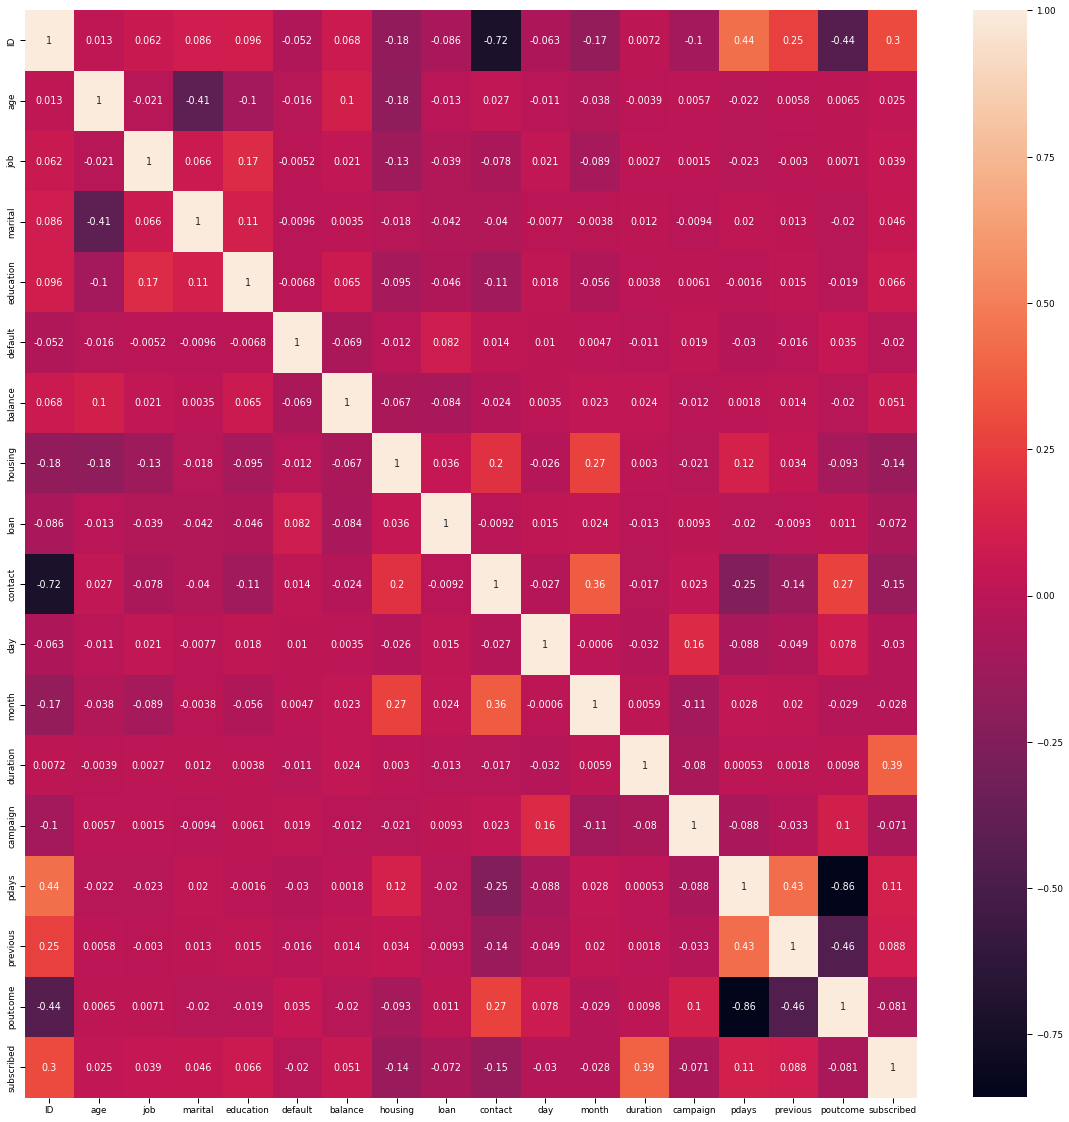

In [118]:
plt.figure(figsize=(20,20))
sns.heatmap(df1c,annot= True)

In [119]:
df1.skew()

ID             0.005851
age            0.681607
job            0.264817
marital       -0.100071
education      0.199441
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
contact        0.758602
day            0.087185
month         -0.486498
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome      -1.996421
subscribed     2.377445
dtype: float64

<AxesSubplot:xlabel='age'>

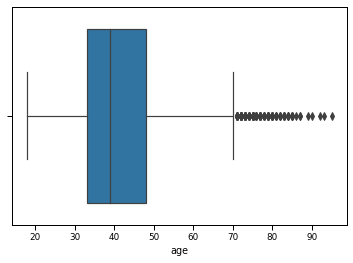

In [120]:
sns.boxplot(data=df2, x='age')

In [121]:
from scipy.stats import zscore

In [122]:
z=np.abs(zscore(df1))
z

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0.271192,1.415793,1.324317,0.275405,2.369229,0.137234,0.187933,1.118201,0.439893,0.395076,0.379579,1.154007,0.832754,0.245906,0.408555,0.237059,0.441777,0.364694
1,1.377516,0.937156,2.037729,0.275405,0.300345,0.137234,0.449397,1.118201,0.439893,0.716695,0.499526,0.177462,0.649957,0.245906,0.408555,0.237059,0.441777,0.364694
2,0.554001,1.313627,0.815167,0.275405,0.300345,0.137234,0.156159,0.894294,0.439893,0.716695,0.259631,0.177462,0.070449,0.567059,0.408555,0.237059,0.441777,0.364694
3,1.636469,1.509911,0.101755,1.922374,1.034442,0.137234,0.635055,1.118201,0.439893,0.716695,0.739422,0.155405,2.368149,0.567059,0.447299,1.001336,0.576498,2.742026
4,0.556606,0.937156,1.426448,0.275405,0.300345,0.137234,0.411091,0.894294,0.439893,0.716695,1.419637,0.843197,0.474054,0.567059,0.408555,0.237059,0.441777,0.364694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,1.064493,1.125392,0.101755,1.371563,1.034442,0.137234,0.450388,0.894294,0.439893,0.716695,0.460055,0.821140,0.552724,0.245906,0.408555,0.237059,0.441777,0.364694
31643,1.347078,1.133439,0.101755,1.922374,1.034442,0.137234,0.324903,1.118201,2.273280,0.716695,1.299690,0.155405,0.699635,0.245906,0.408555,0.237059,0.441777,2.742026
31644,0.218265,0.843038,0.101755,1.371563,1.034442,0.137234,0.347358,1.118201,0.439893,0.716695,1.059794,1.508931,0.859979,0.075247,0.408555,0.237059,0.441777,0.364694
31645,1.223031,1.509911,1.426448,0.275405,0.300345,0.137234,0.376088,0.894294,0.439893,0.395076,0.100212,0.821140,0.918319,1.359859,2.994723,4.716521,2.613048,0.364694


In [123]:
dfz=df1[(z<3).all(axis=1)]
dfz

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,3.0,0.0
1,40576,31,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,3.0,0.0
2,15320,27,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,3.0,0.0
3,43962,57,4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,2.0,1.0
4,29842,31,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,12109,43,4.0,2.0,1.0,0.0,2968,0.0,0.0,2.0,20,6.0,30,4,-1,0,3.0,0.0
31641,9476,37,9.0,2.0,2.0,0.0,1309,0.0,0.0,2.0,6,6.0,442,2,-1,0,3.0,0.0
31642,36483,29,4.0,2.0,2.0,0.0,0,1.0,0.0,0.0,12,8.0,116,2,-1,0,3.0,0.0
31643,40178,53,4.0,0.0,2.0,0.0,380,0.0,1.0,0.0,5,6.0,438,2,-1,0,3.0,1.0


In [124]:
print("% of Data Lost=   ", ((df1.shape[0]-dfz.shape[0])/df1.shape[0])*100)

% of Data Lost=    12.83849969981357


In [125]:
dfz.drop('ID',axis=1,inplace= True)
dfz

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,3.0,0.0
1,31,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,3.0,0.0
2,27,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,3.0,0.0
3,57,4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,2.0,1.0
4,31,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,43,4.0,2.0,1.0,0.0,2968,0.0,0.0,2.0,20,6.0,30,4,-1,0,3.0,0.0
31641,37,9.0,2.0,2.0,0.0,1309,0.0,0.0,2.0,6,6.0,442,2,-1,0,3.0,0.0
31642,29,4.0,2.0,2.0,0.0,0,1.0,0.0,0.0,12,8.0,116,2,-1,0,3.0,0.0
31643,53,4.0,0.0,2.0,0.0,380,0.0,1.0,0.0,5,6.0,438,2,-1,0,3.0,1.0


In [226]:
df2=pd.read_csv('termdeposit_test.csv')
df2

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [228]:
df2.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [229]:
df2.shape

(13564, 17)

In [230]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


- There is null null value present in he data sets 
- the total rows in the data set is 31647 while total columns availables are 18 (size of dataset)

In [231]:
df2.nunique()

ID           13564
age             75
job             12
marital          3
education        4
default          2
balance       4292
housing          2
loan             2
contact          3
day             31
month           12
duration      1201
campaign        40
pdays          422
previous        33
poutcome         4
dtype: int64

- From unique value feature it is clear that BALANCE, DURATION,PDAYS are continious data while other are catagorical data

In [232]:
oe= OrdinalEncoder()
for i in df2.columns:
    if df2[i].dtypes=='object':
        df2[i]=oe.fit_transform(df2[i].values.reshape(-1,1))
df2

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,7.0,1.0,1.0,0.0,118,1.0,0.0,0.0,15,8.0,20,6,-1,0,3.0
1,40403,78,5.0,0.0,0.0,0.0,2787,0.0,0.0,1.0,1,5.0,372,1,-1,0,3.0
2,3709,31,6.0,2.0,2.0,0.0,144,1.0,0.0,2.0,16,8.0,676,1,-1,0,3.0
3,37422,57,7.0,2.0,0.0,0.0,3777,1.0,0.0,1.0,13,8.0,65,2,-1,0,3.0
4,12527,45,1.0,0.0,1.0,0.0,-705,0.0,1.0,2.0,3,5.0,111,1,-1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,4.0,1.0,2.0,0.0,45,0.0,0.0,0.0,28,1.0,148,4,-1,0,3.0
13560,11743,54,1.0,1.0,0.0,0.0,2281,1.0,0.0,2.0,20,6.0,158,1,-1,0,3.0
13561,28292,35,5.0,1.0,0.0,0.0,285,1.0,0.0,0.0,29,4.0,136,1,-1,0,3.0
13562,45163,29,0.0,2.0,1.0,0.0,464,0.0,0.0,0.0,9,9.0,208,2,91,3,2.0


In [233]:
df2.describe()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.00000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,22704.057726,40.887128,4.355721,1.168903,1.224344,0.016957,1358.496535,0.556326,0.15578,0.629976,15.738646,5.499410,258.278679,2.759510,41.648555,0.594441,2.545562
std,12994.043329,10.604108,3.274561,0.610680,0.745224,0.129114,3082.940623,0.496836,0.36266,0.894322,8.288174,3.013095,258.488648,3.060928,101.985178,1.998193,1.005069
min,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,-3313.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,11546.000000,33.000000,1.000000,1.000000,1.000000,0.000000,71.000000,0.000000,0.00000,0.000000,8.000000,3.000000,102.000000,1.000000,-1.000000,0.000000,3.000000
50%,22782.000000,39.000000,4.000000,1.000000,1.000000,0.000000,445.000000,1.000000,0.00000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000
75%,33974.250000,48.000000,7.000000,2.000000,2.000000,0.000000,1413.250000,1.000000,0.00000,2.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,3.000000
max,45206.000000,95.000000,11.000000,2.000000,3.000000,1.000000,98417.000000,1.000000,1.00000,2.000000,31.000000,11.000000,3253.000000,58.000000,850.000000,55.000000,3.000000


In [135]:
df2c=df2.corr()
df2c

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
ID,1.000000,0.018874,0.065762,0.070859,0.090366,-0.056901,0.086916,-0.166996,-0.079589,-0.718882,-0.056813,-0.154451,0.026686,-0.101389,0.441437,0.321845,-0.449871
age,0.018874,1.000000,-0.024413,-0.396771,-0.117274,-0.022243,0.085246,-0.189573,-0.022863,0.024945,-0.004622,-0.051712,-0.006456,0.002439,-0.027797,-0.011326,0.009334
job,0.065762,-0.024413,1.000000,0.052579,0.158185,-0.010780,0.012731,-0.125409,-0.018603,-0.090929,0.027381,-0.100924,0.009494,0.019584,-0.028884,0.005024,0.020020
marital,0.070859,-0.396771,0.052579,1.000000,0.110982,-0.000793,-0.000986,-0.012039,-0.059223,-0.036893,0.000419,-0.014271,0.012563,-0.008048,0.017854,0.021518,-0.010196
education,0.090366,-0.117274,0.158185,0.110982,1.000000,-0.020382,0.063001,-0.080032,-0.054845,-0.108417,0.033917,-0.060441,-0.002513,0.006523,0.003763,0.024317,-0.020194
default,-0.056901,-0.022243,-0.010780,-0.000793,-0.020382,1.000000,-0.060447,0.008097,0.066402,0.018585,0.007931,0.027885,-0.008022,0.012558,-0.030713,-0.025641,0.034386
balance,0.086916,0.085246,0.012731,-0.000986,0.063001,-0.060447,1.000000,-0.071759,-0.086091,-0.034654,0.006890,0.012272,0.015375,-0.020524,0.007136,0.024824,-0.023993
housing,-0.166996,-0.189573,-0.125409,-0.012039,-0.080032,0.008097,-0.071759,1.000000,0.053394,0.171775,-0.033407,0.271594,0.009843,-0.029587,0.136453,0.045626,-0.116616
loan,-0.079589,-0.022863,-0.018603,-0.059223,-0.054845,0.066402,-0.086091,0.053394,1.000000,-0.015035,0.003121,0.017189,-0.011538,0.011501,-0.028705,-0.016183,0.025735
contact,-0.718882,0.024945,-0.090929,-0.036893,-0.108417,0.018585,-0.034654,0.171775,-0.015035,1.000000,-0.030176,0.356889,-0.030957,0.012308,-0.244138,-0.168726,0.272425


<AxesSubplot:>

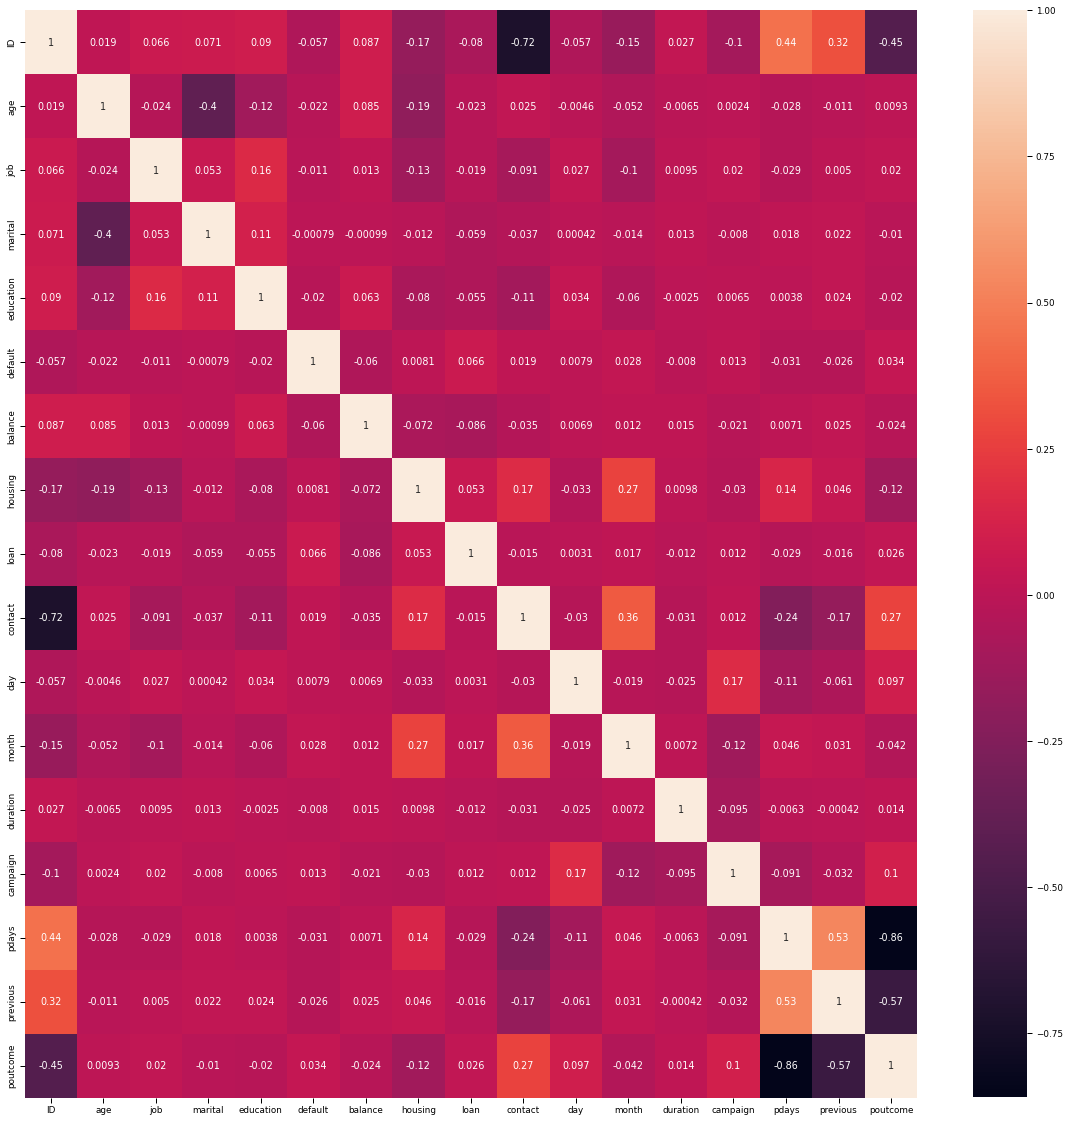

In [136]:
plt.figure(figsize=(20,20))
sns.heatmap(df2c,annot= True)

In [137]:
df2.skew()

ID          -0.013625
age          0.692404
job          0.254647
marital     -0.109220
education    0.192137
default      7.483552
balance      9.165015
housing     -0.226771
loan         1.898587
contact      0.794849
day          0.106806
month       -0.465848
duration     3.017221
campaign     4.958236
pdays        2.555601
previous     8.704583
poutcome    -1.921847
dtype: float64

In [ ]:
df2.drop("ID", axis=1, inplace=True)
df2

In [139]:
from scipy.stats import zscore

In [140]:
z2=np.abs(zscore(df2))
z2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.838114,0.807551,0.276592,0.301053,0.131336,0.402389,0.893033,0.429564,0.704444,0.089124,0.829938,0.921849,1.058702,0.418199,0.297500,0.452163
1,3.499987,0.196760,1.914173,1.642982,0.131336,0.463375,1.119779,0.429564,0.413763,1.778340,0.165753,0.439963,0.574850,0.418199,0.297500,0.452163
2,0.932421,0.502156,1.360988,1.040875,0.131336,0.393955,0.893033,0.429564,1.531969,0.031534,0.829938,1.616074,0.574850,0.418199,0.297500,0.452163
3,1.519549,0.807551,1.360988,1.642982,0.131336,0.784508,0.893033,0.429564,0.413763,0.330440,0.829938,0.747754,0.248140,0.418199,0.297500,0.452163
4,0.387871,1.024823,1.914173,0.301053,0.131336,0.669352,1.119779,2.327941,1.531969,1.537023,0.165753,0.569789,0.574850,0.418199,0.297500,0.452163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,0.177969,0.108636,0.276592,1.040875,0.131336,0.426069,1.119779,0.429564,0.704444,1.479434,1.493340,0.426644,0.405281,0.418199,0.297500,0.452163
13560,1.236630,1.024823,0.276592,1.642982,0.131336,0.299239,0.893033,0.429564,1.531969,0.514168,0.166144,0.387957,0.574850,0.418199,0.297500,0.452163
13561,0.555195,0.196760,0.276592,1.642982,0.131336,0.348218,0.893033,0.429564,0.704444,1.600092,0.497650,0.473070,0.574850,0.418199,0.297500,0.452163
13562,1.121034,1.330219,1.360988,0.301053,0.131336,0.290155,1.119779,0.429564,0.704444,0.813073,1.161835,0.194517,0.248140,0.483926,1.203911,0.542830


In [141]:
df2z=df2[(z2<3).all(axis=1)]
df2z

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,7.0,1.0,1.0,0.0,118,1.0,0.0,0.0,15,8.0,20,6,-1,0,3.0
2,31,6.0,2.0,2.0,0.0,144,1.0,0.0,2.0,16,8.0,676,1,-1,0,3.0
3,57,7.0,2.0,0.0,0.0,3777,1.0,0.0,1.0,13,8.0,65,2,-1,0,3.0
4,45,1.0,0.0,1.0,0.0,-705,0.0,1.0,2.0,3,5.0,111,1,-1,0,3.0
5,32,4.0,2.0,2.0,0.0,0,1.0,0.0,0.0,22,5.0,455,2,-1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13558,32,9.0,2.0,1.0,0.0,129,1.0,0.0,0.0,7,8.0,213,1,-1,0,3.0
13559,39,4.0,1.0,2.0,0.0,45,0.0,0.0,0.0,28,1.0,148,4,-1,0,3.0
13560,54,1.0,1.0,0.0,0.0,2281,1.0,0.0,2.0,20,6.0,158,1,-1,0,3.0
13561,35,5.0,1.0,0.0,0.0,285,1.0,0.0,0.0,29,4.0,136,1,-1,0,3.0


In [142]:
print("% of Data Lost=   ", ((df2.shape[0]-df2z.shape[0])/df2.shape[0])*100)

% of Data Lost=    12.850191683869063


In [145]:
from sklearn.model_selection import train_test_split

In [149]:
x=df1.drop('subscribed',axis=1)
y=df1['subscribed']

In [150]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=52)

In [152]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((25317, 17), (6330, 17), (25317,), (6330,))

### Logistic Regression 

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [154]:
lr=LogisticRegression()

In [155]:
lr.fit(x_train,y_train)

LogisticRegression()

In [156]:
y_lr=lr.predict(x_test)

In [188]:
print(accuracy_score(y_test,y_lr))
print(confusion_matrix(y_test,y_lr))
print(classification_report(y_test,y_lr))

0.8821484992101106
[[5395  154]
 [ 592  189]]
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.94      5549
         1.0       0.55      0.24      0.34       781

    accuracy                           0.88      6330
   macro avg       0.73      0.61      0.64      6330
weighted avg       0.86      0.88      0.86      6330



### Support Vector Classifier  

In [165]:
from sklearn.svm import SVC

In [166]:
svc=SVC()

In [167]:
svc.fit(x_train,y_train)

SVC()

In [169]:
y_svc=svc.predict(x_test)

In [187]:
print(accuracy_score(y_test,y_svc))
print(confusion_matrix(y_test,y_svc))
print(classification_report(y_test,y_svc))

0.8766192733017377
[[5549    0]
 [ 781    0]]
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93      5549
         1.0       0.00      0.00      0.00       781

    accuracy                           0.88      6330
   macro avg       0.44      0.50      0.47      6330
weighted avg       0.77      0.88      0.82      6330



### Decision Tree Classifier

In [171]:
from sklearn.tree import DecisionTreeClassifier 

In [172]:
dtc=DecisionTreeClassifier()

In [173]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [174]:
y_dtc=dtc.predict(x_test)

In [186]:
print(accuracy_score(y_test,y_dtc))
print(confusion_matrix(y_test,y_dtc))
print(classification_report(y_test,y_dtc))

0.8832543443917852
[[5194  355]
 [ 384  397]]
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93      5549
         1.0       0.53      0.51      0.52       781

    accuracy                           0.88      6330
   macro avg       0.73      0.72      0.73      6330
weighted avg       0.88      0.88      0.88      6330



### KNN Classifier

In [179]:
from sklearn.neighbors import KNeighborsClassifier

In [180]:
knn=KNeighborsClassifier()

In [181]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [182]:
y_knn=knn.predict(x_test)

In [185]:
print(accuracy_score(y_test,y_knn))
print(confusion_matrix(y_test,y_knn))
print(classification_report(y_test,y_knn))

0.8919431279620853
[[5338  211]
 [ 473  308]]
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      5549
         1.0       0.59      0.39      0.47       781

    accuracy                           0.89      6330
   macro avg       0.76      0.68      0.71      6330
weighted avg       0.88      0.89      0.88      6330



### Gradient Boosting Classifier, Ada Boost Classifier, Bagging Classifier

In [189]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier 

In [190]:
gbc=GradientBoostingClassifier()

In [191]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [192]:
y_gbc=gbc.predict(x_test)

In [193]:
print(accuracy_score(y_test,y_gbc))
print(confusion_matrix(y_test,y_gbc))
print(classification_report(y_test,y_gbc))

0.909478672985782
[[5349  200]
 [ 373  408]]
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      5549
         1.0       0.67      0.52      0.59       781

    accuracy                           0.91      6330
   macro avg       0.80      0.74      0.77      6330
weighted avg       0.90      0.91      0.90      6330



In [194]:
ad=AdaBoostClassifier()

In [196]:
ad.fit(x_train,y_train)

AdaBoostClassifier()

In [197]:
y_ad=ad.predict(x_test)

In [203]:
print(accuracy_score(y_test,y_ad))
print(confusion_matrix(y_test,y_ad))
print(classification_report(y_test,y_ad))

0.9026856240126382
[[5408  141]
 [ 475  306]]
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      5549
         1.0       0.68      0.39      0.50       781

    accuracy                           0.90      6330
   macro avg       0.80      0.68      0.72      6330
weighted avg       0.89      0.90      0.89      6330



In [204]:
bc=BaggingClassifier()

In [205]:
bc.fit(x_train,y_train)

BaggingClassifier()

In [206]:
y_bc=bc.predict(x_test)

In [207]:
print(accuracy_score(y_test,y_bc))
print(confusion_matrix(y_test,y_bc))
print(classification_report(y_test,y_bc))

0.9042654028436019
[[5347  202]
 [ 404  377]]
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      5549
         1.0       0.65      0.48      0.55       781

    accuracy                           0.90      6330
   macro avg       0.79      0.72      0.75      6330
weighted avg       0.90      0.90      0.90      6330



In [208]:
etc=ExtraTreesClassifier()

In [210]:
etc.fit(x_train,y_train)

ExtraTreesClassifier()

In [211]:
y_etc=etc.predict(x_test)

In [221]:
print(accuracy_score(y_test,y_etc))
print(confusion_matrix(y_test,y_etc))
print(classification_report(y_test,y_etc))

0.9014218009478673
[[5393  156]
 [ 468  313]]
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      5549
         1.0       0.67      0.40      0.50       781

    accuracy                           0.90      6330
   macro avg       0.79      0.69      0.72      6330
weighted avg       0.89      0.90      0.89      6330



- From all the algorith Bagging Classifier gives maximum accuracy i.e 90.42%

# Hyper Tuning Parameter

In [213]:
from sklearn.model_selection import GridSearchCV

In [214]:
parameters={'criterion': ['gini','entropy'],
           'random_state':[10,50,100],
           'max_depth':[0,10,20],
           'n_jobs':[-2,-1,1],
           'n_estimators':[50,100,200,300]}

In [219]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [220]:
GCV.fit(x_train,y_train)

KeyboardInterrupt: 

In [ ]:
GCV.best_params_

In [ ]:
Final_model=ExtraTreesClassifier(criterion= 'entropy',max_depth= 20, n_estimators= 50, n_jobs= -2, random_state= 10)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
print(accuracy_score(y_test,y_etc))
print(confusion_matrix(y_test,y_etc))
print(classification_report(y_test,y_etc))
acc=accuracy_score(y_test,pred)
print(acc*100)

# Now Get the result from Test File

In [224]:
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,7.0,1.0,1.0,0.0,118,1.0,0.0,0.0,15,8.0,20,6,-1,0,3.0
1,78,5.0,0.0,0.0,0.0,2787,0.0,0.0,1.0,1,5.0,372,1,-1,0,3.0
2,31,6.0,2.0,2.0,0.0,144,1.0,0.0,2.0,16,8.0,676,1,-1,0,3.0
3,57,7.0,2.0,0.0,0.0,3777,1.0,0.0,1.0,13,8.0,65,2,-1,0,3.0
4,45,1.0,0.0,1.0,0.0,-705,0.0,1.0,2.0,3,5.0,111,1,-1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4.0,1.0,2.0,0.0,45,0.0,0.0,0.0,28,1.0,148,4,-1,0,3.0
13560,54,1.0,1.0,0.0,0.0,2281,1.0,0.0,2.0,20,6.0,158,1,-1,0,3.0
13561,35,5.0,1.0,0.0,0.0,285,1.0,0.0,0.0,29,4.0,136,1,-1,0,3.0
13562,29,0.0,2.0,1.0,0.0,464,0.0,0.0,0.0,9,9.0,208,2,91,3,2.0


In [225]:
x_train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [234]:
y_etc_final=etc.predict(df2)

In [235]:
y_etc

array([0., 0., 0., ..., 0., 0., 0.])

In [236]:
final_result=pd.DataFrame()

In [237]:
final_result['ID']=df2['ID']
final_result['subscribed']=df1['subscribed']

In [238]:
final_result

,ID,subscribed
0,38441,0.0
1,40403,0.0
2,3709,0.0
3,37422,1.0
4,12527,0.0
...,...,...
13559,23465,0.0
13560,11743,0.0
13561,28292,0.0
13562,45163,0.0


In [239]:
final_result['subscribed'].replace(0,'No', inplace=True)
final_result['subscribed'].replace(1,'Yes', inplace=True)

In [240]:
final_result

,ID,subscribed
0,38441,No
1,40403,No
2,3709,No
3,37422,Yes
4,12527,No
...,...,...
13559,23465,No
13560,11743,No
13561,28292,No
13562,45163,No
